# GS - Entrega da Global Solution

## Integrantes

*   **RM 558843** - Laura de Oliveira Cintra

*   **RM 558832** - Maria Eduarda Alves da Paixão

*   **RM 554456** - Vinícius Saes de Souza

## Objetivo
Exploraremos o dataset Consumo Energético que contém informações sobre o consumo mensal de energia em diferentes categorias de habitação e localizações.

Questão: **Quais características impactam o consumo de energia e sua variação ao longo do tempo?**

## Análise e Modelo
Após a realização da análise exploratória dos dados, desenvolvemos e treinamos dois modelos supervisionados:

* **Modelo de Classificação:** Este modelo foi treinado para prever se o consumo de energia (em kWh) aumentará ou diminuirá no próximo mês. Para avaliar sua performance, utilizamos métricas como acurácia, precisão e recall

* **Modelo de Regressão:** Esse modelo consegue prever quantos kWh irão aumentar ou diminuir no próximo mês. A avaliação deste modelo foi feita utilizando o erro quadrático médio (MSE).

# 1. Análise Exploratória

O dataset contém dados mensais sobre o consumo de energia elétrica, incluindo o consumo em kWh e variáveis relacionadas, como temperatura. A variável alvo é o consumo no próximo mês, e o objetivo é desenvolver modelos para prever as flutuações no consumo de energia, ajudando na otimização e no consumo sustentável.

## 1. Carregamento e visualização inicial dos dados
Carregamos o dataset e configuramos as bibliotecas necessárias.


In [3]:
# Instalar as bibiliotecas necessárias
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ler o arquivo CSV
data = pd.read_csv('../consumo_energia_v2.csv')

# Exibir as primeiras linhas
data.head()


,ID_usuario,Data_conta,Consumo_mensal_kWh,Variação_do_consumo,Média_consumo,Consumo_total_acumulado,Categoria,Num_moradores,Renda,Localização,Mês,Consumo_Anterior,Variação_do_consumo_prevista
0,1,2023-01-01,300,24,300.00,300,Apartamento,3,7000,RS,1,276,Aumento
1,1,2023-01-31,311,11,305.50,611,Apartamento,3,7000,RS,2,300,Aumento
2,1,2023-03-02,306,-5,305.67,917,Apartamento,3,7000,RS,3,311,Diminuição
3,1,2023-04-01,317,11,308.50,1234,Apartamento,3,7000,RS,4,306,Aumento
4,1,2023-05-01,323,6,311.40,1557,Apartamento,3,7000,RS,5,317,Aumento


##2. Tratamento de dados faltantes

Verificando se há dados faltantes em alguma coluna.

In [5]:
# Verificando valores nulos
faltantes = data.isnull().sum()

# Exibindo a quantidade de valores nulos por coluna
print("----- Dados Faltantes -----\n")
print(faltantes)

----- Dados Faltantes -----

ID_usuario                      0
Data_conta                      0
Consumo_mensal_kWh              0
Variação_do_consumo             0
Média_consumo                   0
Consumo_total_acumulado         0
Categoria                       0
Num_moradores                   0
Renda                           0
Localização                     0
Mês                             0
Consumo_Anterior                0
Variação_do_consumo_prevista    0
dtype: int64


Podemos notar que não há dados faltantes no dataset sendo analisado.

## 3. Exploração descritiva dos dados:

Análise descritiva para entender melhor as variáveis.



In [6]:
print("\nDistribuição das classes target:")
print(data['Variação_do_consumo_prevista'].value_counts())


Distribuição das classes target:
Variação_do_consumo_prevista
Aumento       921
Diminuição     79
Name: count, dtype: int64


In [7]:
# Análise das variáveis numéricas
# Exibe estatísticas como média, mediana, mínimo, máximo e desvio padrão
data.describe()

,ID_usuario,Consumo_mensal_kWh,Variação_do_consumo,Média_consumo,Consumo_total_acumulado,Num_moradores,Renda,Mês,Consumo_Anterior
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,100.500000,453.551000,21.584000,432.035000,1317.702000,3.050000,4385.000000,3.000000,431.967000
std,57.763194,116.755879,14.233395,108.929908,751.200799,1.378187,1808.326587,1.414921,113.141358
min,1.000000,200.000000,-14.000000,200.000000,200.000000,1.000000,2000.000000,1.000000,200.000000
25%,50.750000,361.000000,11.000000,341.000000,659.250000,2.000000,3000.000000,2.000000,335.000000
50%,100.500000,464.500000,22.000000,442.000000,1191.000000,3.000000,4000.000000,3.000000,441.500000
75%,150.250000,544.250000,31.000000,521.000000,1853.000000,4.000000,6000.000000,4.000000,521.000000
max,200.000000,740.000000,63.000000,673.000000,3365.000000,5.000000,7000.000000,5.000000,701.000000


## 4. Criação de visualizações

Criando gráficos que ajudam a entender padrões ou relações entre variáveis.

In [8]:
# Convertendo 'Data_conta' para o formato datetime e ordenando o dataframe
data['Data_conta'] = pd.to_datetime(data['Data_conta'])
data = data.sort_values(by='Data_conta')

# Resumo das categorias e localidades
categoria_counts = data['Categoria'].value_counts()
localizacao_counts = data['Localização'].value_counts()
media_consumo_localizacao = data.groupby('Localização')['Consumo_mensal_kWh'].mean().reset_index()

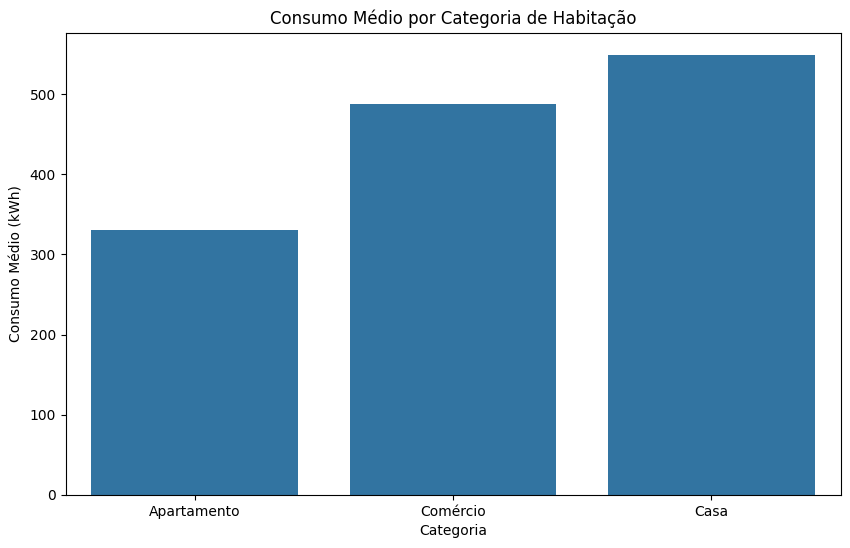

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=categoria_counts.index, y=data.groupby('Categoria')['Consumo_mensal_kWh'].mean())
plt.title('Consumo Médio por Categoria de Habitação')
plt.ylabel('Consumo Médio (kWh)')
plt.xlabel('Categoria')
plt.show()

**Interpretação:** Este gráfico nos ajuda a visualizar o consumo médio de kWh por categoria de habitação.

* Notamos uma predominância do consumo em casas, o que faz sentido, considerando o tamanho da mesma em relação a apartamentos por exemplo, podemos deduzir que isso permite uma quantidade maior de eletrodomésticos e consequentemente mais uso, mais consumo.

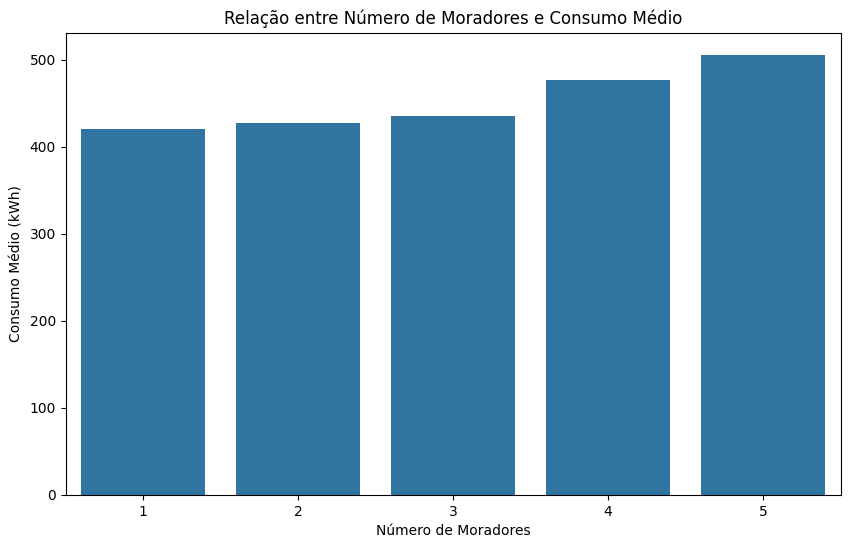

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Num_moradores', y='Consumo_mensal_kWh', data=data, errorbar=None)
plt.title('Relação entre Número de Moradores e Consumo Médio')
plt.ylabel('Consumo Médio (kWh)')
plt.xlabel('Número de Moradores')
plt.show()

**Interpretação:** Este gráfico nos ajuda a visualizar a elação entre número de moradores e consumo médio.

* Como esperado, podemos observar uma relação diretamente proporcional, pois quanto maior o número de moradores, maior será o consumo médio.

<Figure size 800x500 with 0 Axes>

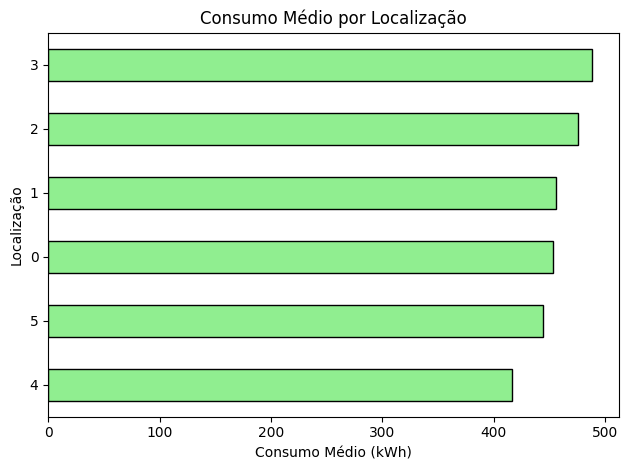

In [11]:
plt.figure(figsize=(8, 5))
media_consumo_localizacao.sort_values(by='Consumo_mensal_kWh').plot(kind='barh', color='lightgreen', edgecolor='black', legend=False)
plt.title('Consumo Médio por Localização')
plt.xlabel('Consumo Médio (kWh)')
plt.ylabel('Localização')
plt.tight_layout()
plt.show()

**Interpretação:** Este gráfico nos ajuda a visualizar o consumo médio por localização

* Podemos observar que certos lugares tem um consumo médio maior com relação a outros, o que prova que a localização também é um fator de influência no consumo.

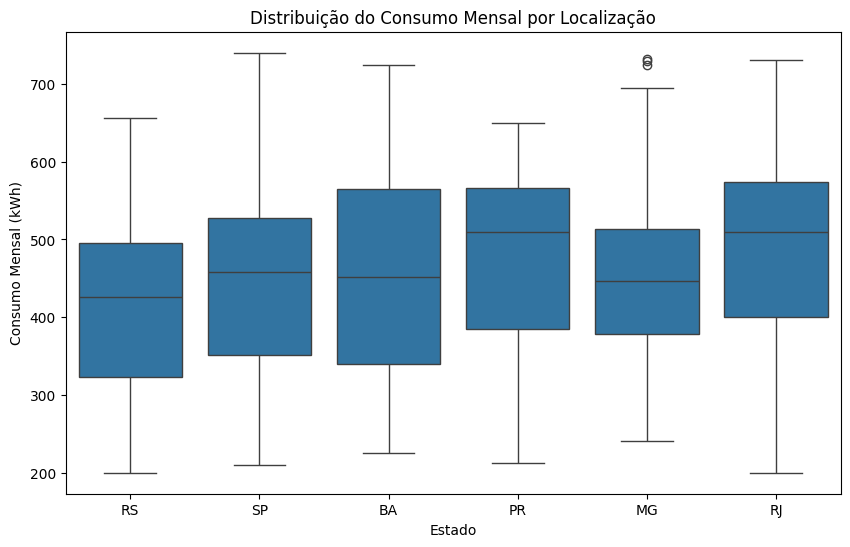

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Localização', y='Consumo_mensal_kWh', data=data)
plt.title('Distribuição do Consumo Mensal por Localização')
plt.ylabel('Consumo Mensal (kWh)')
plt.xlabel('Estado')
plt.show()

**Interpretação:** Este gráfico nos ajuda a visualizar a distribuição de consumo mensal por estado.

* Podemos ver quantidades de consumo concentradas em certas faixas em todos os estados, que não costumam consumir menos que 300 kWh por mês, e dificilmente ultrapassam 600 kWh.

* É possível observar que mesmo a média de consumo sendo maior em certos lugares, algumas localizações como São Paulo, tem certos "picos" de consumo mensal em relação aos outros estados.

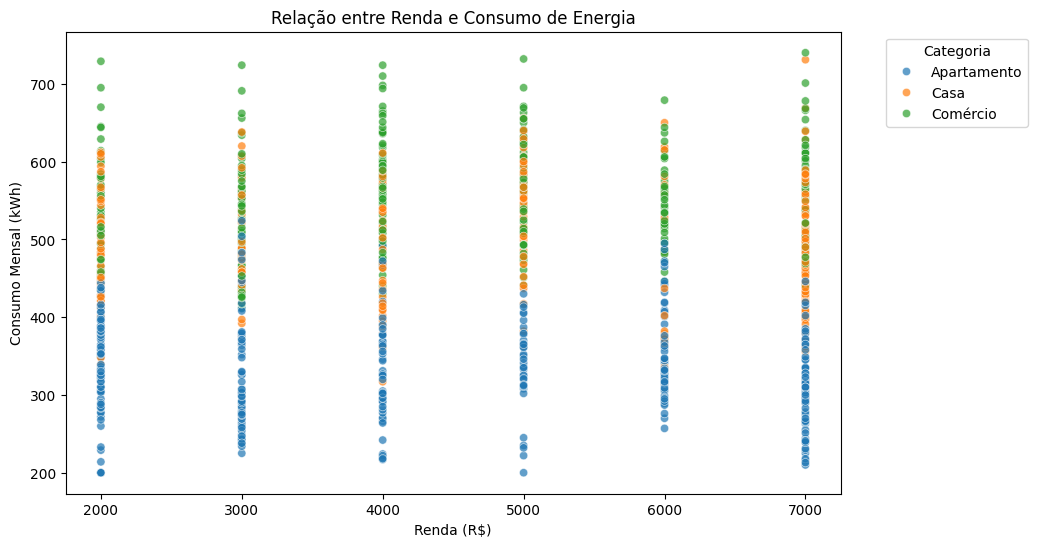

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Renda', y='Consumo_mensal_kWh', hue='Categoria', data=data, alpha=0.7)
plt.title('Relação entre Renda e Consumo de Energia')
plt.ylabel('Consumo Mensal (kWh)')
plt.xlabel('Renda (R$)')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Interpretação:** Este gráfico nos ajuda a visualizar a relação entre renda e consumo.

* Podemos observar que, como esperado, o maior consumo sempre é atingido por comércios, independente da renda.

* Também é possível enxergar que, com exceção dos comércios, rendas como
2000 reais não ultrapassam 600 kWh, mas rendas a partir de R$3000.00 já começam a ultrapassar essa faixa com maior frequência.

##Interpretação dos Resultados

**Quais características impactam o consumo de energia e sua variação ao longo do tempo?**

Com a análise, percebemos que existem fatores importantes que impactam o consumo de energia e suas variações:

* **Consumo médio:** Existem padrões de consumo que se tornam consistentes ao longo do tempo.

* **Número de moradores:** Quanto maior o número de moradores, maior tende a ser o consumo energético, refletindo maior demanda por recursos como iluminação, eletrônicos e eletrodomésticos.

* **Renda:** Famílias com maior renda geralmente apresentam maior consumo de energia, possivelmente devido ao uso de mais aparelhos eletrônicos e climatização.

* **Categoria de habitação**: Categorias como "Comércio" apresentam maior consumo médio em comparação com residências, refletindo atividades econômicas que demandam maior energia.

* **Localização geográfica**: Regiões urbanas têm maior consumo médio, possivelmente por conta de padrões de vida, densidade populacional e infraestrutura energética.

Por fim, podemos concluir que o consumo de energia é altamente influenciado por fatores demográficos, socioeconômicos e contextuais.

# 2. Criação dos modelos supervisionados

## 1. Importação das Bibliotecas Necessárias

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 2. Selecionando as Variáveis de Entrada e Saída

In [15]:
# Variáveis de entrada (features) e saída (target) para classificação
features_classificacao = data[['Consumo_Anterior', 'Média_consumo', 'Num_moradores', 'Renda']]
target_classificacao = data['Variação_do_consumo_prevista']

# Variáveis de entrada (features) e saída (target) para regressão
features_regressao = data[['Consumo_Anterior', 'Média_consumo', 'Num_moradores', 'Renda']]
target_regressao = data['Variação_do_consumo']

## 3. Codificando Variáveis Categóricas

In [16]:
# Para a variável de saída de classificação
label_encoder = LabelEncoder()
target_classificacao_encoded = label_encoder.fit_transform(target_classificacao)

## 4. Padronização dos dados

In [17]:
scaler = StandardScaler()

# Padronizar as variáveis de entrada
features_classificacao_scaled = scaler.fit_transform(features_classificacao)
features_regressao_scaled = scaler.fit_transform(features_regressao)

## 5. Dividir os Dados em Treino e Teste

In [18]:
# Para o modelo de classificação
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    features_classificacao_scaled, target_classificacao_encoded, test_size=0.3, random_state=42
)

# Para o modelo de regressão
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    features_regressao_scaled, target_regressao, test_size=0.3, random_state=42
)

##6. Verificando o tamanho dos Dados

In [19]:
print("Classificação - Conjunto de Treino:", X_train_class.shape, y_train_class.shape)
print("Classificação - Conjunto de Teste:", X_test_class.shape, y_test_class.shape)
print()
print("Regressão - Conjunto de Treino:", X_train_reg.shape, y_train_reg.shape)
print("Regressão - Conjunto de Teste:", X_test_reg.shape, y_test_reg.shape)

Classificação - Conjunto de Treino: (700, 4) (700,)
Classificação - Conjunto de Teste: (300, 4) (300,)

Regressão - Conjunto de Treino: (700, 4) (700,)
Regressão - Conjunto de Teste: (300, 4) (300,)


## 7. Avaliação dos Modelos

### 7.1 Classificação

In [20]:
# Instanciar e treinar o modelo
modelo_classificacao = RandomForestClassifier(random_state=42)
modelo_classificacao.fit(X_train_class, y_train_class)

# Fazer previsões
y_pred_class = modelo_classificacao.predict(X_test_class)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test_class, y_pred_class))
print("Precisão:", precision_score(y_test_class, y_pred_class, average='weighted'))
print("Recall:", recall_score(y_test_class, y_pred_class, average='weighted'))
print("\nRelatório de Classificação:\n", classification_report(y_test_class, y_pred_class))

Acurácia: 0.92
Precisão: 0.9111288711288713
Recall: 0.92

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       282
           1       0.29      0.22      0.25        18

    accuracy                           0.92       300
   macro avg       0.62      0.59      0.60       300
weighted avg       0.91      0.92      0.92       300



### 7.2 Regressão

In [21]:
# Instanciar e treinar o modelo
modelo_regressao = RandomForestRegressor(random_state=42)
modelo_regressao.fit(X_train_reg, y_train_reg)

# Fazer previsões
y_pred_reg = modelo_regressao.predict(X_test_reg)

# Avaliar o modelo
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test_reg, y_pred_reg))
print("Erro Absoluto Médio (MAE):", mean_absolute_error(y_test_reg, y_pred_reg))

Erro Quadrático Médio (MSE): 136.05263300000001
Erro Absoluto Médio (MAE): 9.363966666666665


### 7.3 Testando os modelos

In [ ]:
# Nova amostra para Classificação e Regressão
nova_amostra = {
    'Consumo_Anterior': [150.0],  # Consumo em kWh no mês anterior
    'Média_consumo': [140.0],    # Média de consumo histórico
    'Num_moradores': [4],        # Número de moradores
    'Renda': [3000.0]            # Renda da família
}

# Converter a nova amostra em DataFrame
nova_amostra_df = pd.DataFrame(nova_amostra)

# Padronizar a nova amostra
nova_amostra_scaled = scaler.transform(nova_amostra_df)

# Fazer previsões com o modelo de Classificação
predicao_classificacao = modelo_classificacao.predict(nova_amostra_scaled)
probabilidade_classificacao = modelo_classificacao.predict_proba(nova_amostra_scaled)

# Fazer previsões com o modelo de Regressão
predicao_regressao = modelo_regressao.predict(nova_amostra_scaled)

# Exibir os resultados
print("=== Resultados da Nova Amostra ===\n")

# Classificação
print("Modelo de Classificação:")
print(f"Previsão: {'Aumento' if predicao_classificacao[0] == 1 else 'Diminuição'}")

# Regressão
print("\nModelo de Regressão:")
print(f"Variação Prevista no Consumo: {predicao_regressao[0]:.2f} kWh")

=== Resultados da Nova Amostra ===

Modelo de Classificação:
Previsão: Aumento

Modelo de Regressão:
Variação Prevista no Consumo: 16.87 kWh


## 8. Importando os modelos

Salvando o modelo

In [27]:
import pickle
import joblib

# Salvando o modelo de classificação
joblib.dump(modelo_classificacao, '../modelos/modelo_classificacao.pkl')

# Salvando o modelo de regressão
joblib.dump(modelo_regressao, '../modelos/modelo_regressao.pkl')

# Salvar o scaler usado no pré-processamento
with open('../modelos/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

Carregando o modelo

In [37]:
# Carregar o modelo de classificação
with open('modelos/modelo_classificacao.pkl', 'rb') as modelo_class_file:
    modelo_classificacao = joblib.load(modelo_class_file)

# Carregar o modelo de regressão
with open('modelos/modelo_regressao.pkl', 'rb') as modelo_reg_file:
    modelo_regressao = joblib.load(modelo_reg_file)

# Carregar o scaler usado no pré-processamento
with open('modelos/scaler.pkl', 'rb') as scaler_file:
    scaler = joblib.load(scaler_file)

print("Modelos e scaler carregados com sucesso!")

Modelos e scaler carregados com sucesso!
